In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

Historical Egyptian EGX30 index values, from [EGX](https://egx.com.eg/en/indexdata.aspx?type=1&nav=1)

In [183]:
dataE=pd.read_csv("EGX30.csv",header=0)
dataE.head(-100)

,Date,Value,High,Low
0,06/06/2022,9984.92,9994.77,9957.20
1,05/06/2022,9986.00,10030.32,9971.71
2,02/06/2022,10007.51,10097.21,9990.46
3,01/06/2022,10083.98,10204.49,10041.18
4,31/05/2022,10150.05,10260.08,10109.36
...,...,...,...,...
5854,08/06/1998,892.17,0.00,0.00
5855,07/06/1998,879.69,0.00,0.00
5856,04/06/1998,866.59,0.00,0.00
5857,03/06/1998,836.56,0.00,0.00


In [184]:
daysE = dataE.shape[0]
xE = list(range(daysE))
pricesE = list(reversed(dataE['Value'].tolist() ))
zippedE = list(zip(xE, pricesE ))
dfE = pd.DataFrame(zippedE, columns=['Date', 'Value'])
dfE.head(-100)

,Date,Value
0,0,1000.00
1,1,998.39
2,2,996.25
3,3,992.87
4,4,989.35
...,...,...
5854,5854,11898.42
5855,5855,11949.18
5856,5856,11909.72
5857,5857,11897.40


Historical S&P500 index prices, from [WSJ](https://www.wsj.com/market-data/quotes/index/SPX/historical-prices)

In [186]:
dataS=pd.read_csv("SP500-HistoricalPrices.csv",header=0)
dataS.head(-10)

,Date,Open,High,Low,Close
0,06/06/22,4134.72,4168.78,4109.18,4121.43
1,06/03/22,4137.57,4142.67,4098.67,4108.54
2,06/02/22,4095.41,4177.51,4074.37,4176.82
3,06/01/22,4149.78,4166.54,4073.85,4101.23
4,05/31/22,4151.09,4168.34,4104.88,4132.15
...,...,...,...,...,...
11188,01/23/78,89.24,90.08,88.81,89.24
11189,01/20/78,89.89,91.04,89.74,89.89
11190,01/19/78,90.09,91.04,89.74,90.09
11191,01/18/78,90.56,90.86,89.59,90.56


In [188]:
pricesS = list(reversed(dataS[['Open','Close']].mean(axis=1).tolist()))[-daysE:]
days = dataS.shape[0]
zippedS = list(zip(xE, pricesS ))
dfS = pd.DataFrame(zippedS, columns=['Date', 'Price'])
dfS.head(-10)

,Date,Price
0,0,986.390
1,1,1002.600
2,2,988.560
3,3,984.590
4,4,970.680
...,...,...
5944,5944,4010.515
5945,5945,4070.425
5946,5946,3987.830
5947,5947,3899.895


Historical Wheat prices, from [Macrotrends](https://www.macrotrends.net/2534/wheat-prices-historical-chart-data)

In [189]:
dataW=pd.read_csv("Wheat-HistoricalPrices.csv",header=0)
dataW.head(-1)

,date,price
0,1959-07-01,1.9640
1,1959-07-02,1.9710
2,1959-07-06,1.9700
3,1959-07-07,1.9710
4,1959-07-08,1.9640
...,...,...
15856,2022-05-27,11.5750
15857,2022-05-31,10.8750
15858,2022-06-01,10.4125
15859,2022-06-02,10.5825


In [190]:
pricesW = dataW['price'].tolist()[-daysE:]
zippedW = list(zip(xE, pricesW ))
dfW = pd.DataFrame(zippedW, columns=['Date', 'Price'])
dfW.head(-10)

,Date,Price
0,0,2.9400
1,1,2.9175
2,2,2.9575
3,3,2.9400
4,4,2.8625
...,...,...
5944,5944,12.4750
5945,5945,12.7750
5946,5946,12.3075
5947,5947,12.0050


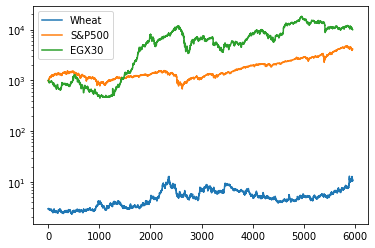

In [191]:
zippedAll = list(zip( pricesW, pricesS, pricesE ))
dfAll = pd.DataFrame(zippedAll, columns=['Wheat', 'S&P500','EGX30'])

dfAll.plot(logy=True)

plt.show()

[Pearson correlation coefficent](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between the wheat prices and S&P500 and EGX30 index values, from 1/1/1998 to 6/6/2022

In [192]:
xW = pricesW-statistics.mean(pricesW)*np.ones(daysE)
xS = pricesS-statistics.mean(pricesS)*np.ones(daysE)
xE = pricesE-statistics.mean(pricesE)*np.ones(daysE)

In [193]:
sigmaW = np.sqrt(np.inner(xW,xW))
sigmaS = np.sqrt(np.inner(xS,xS))
sigmaE = np.sqrt(np.inner(xE,xE))

In [194]:
rWS = np.inner(xW,xS)/(sigmaW * sigmaS)
rWE = np.inner(xW,xE)/(sigmaW * sigmaE)

In [195]:
print(rWS,rWE,rWE/rWS)

0.3573073878211057 0.47746383829636874 1.3362831404298368
